In [29]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cross_validation,preprocessing
from my_answers import NeuralNetwork


def MSE(y, Y):
    return np.mean((y-Y)**2)

data_path = 'smote.csv'
df = pd.read_csv(data_path)
#print(df.head())

dummy_fields = ['Department', 'EducationField', 'JobRole', 'MaritalStatus']
for each in dummy_fields:
    dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
    df = pd.concat([df, dummies], axis=1)

fields_to_drop = ['Department', 'EducationField', 'JobRole', 'MaritalStatus']
data = df.drop(fields_to_drop, axis=1)
#print(data.shape)


X= np.array(data.drop(['Attrition'],1))
X=preprocessing.scale(X) 
y=np.array(data['Attrition'])

X_train, test_features, y_train, test_targets = cross_validation.train_test_split(X,y, test_size=0.2)

train_features,val_features, train_targets, val_targets = cross_validation.train_test_split(X_train,y_train,test_size=0.2)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:

import sys

from my_answers import iterations, learning_rate, hidden_nodes, output_nodes


N_i = train_features.shape[1]
network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

losses = {'train':[], 'validation':[]}
for ii in range(iterations):
    # Go through a random batch of 128 records from the training data set
    X, y = train_features, train_targets
                             
    network.train(X, y)
    
    # Printing out the training progress
    train_loss = MSE(network.run(train_features).T, train_targets)
    val_loss = MSE(network.run(val_features).T, val_targets)
    sys.stdout.write("\rProgress: {:2.1f}".format(100 * ii/float(iterations)) \
                     + "% ... Training loss: " + str(train_loss)[:5] \
                     + " ... Validation loss: " + str(val_loss)[:5])
    sys.stdout.flush()
    
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)


Progress: 100.0% ... Training loss: 0.062 ... Validation loss: 0.165

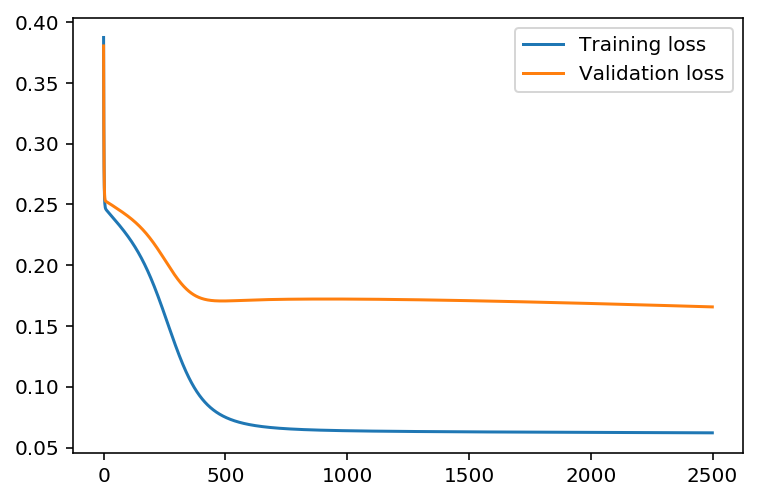

In [31]:
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
_ = plt.ylim()

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error 

predictions = network.run(test_features)
mae=mean_absolute_error(test_targets,predictions)
print(mae)
np.savetxt('predictions.csv', predictions , delimiter=',')
np.savetxt('actual.csv', test_targets , delimiter=',')



0.29807398190631756


In [35]:
for i in range(len(predictions)):
    if(predictions[i][0] >= 0.5):
        predictions[i][0] = 1
    else:
        predictions[i][0] = 0
        
accuracy_score(test_targets,predictions)

0.7874493927125507